## Prompt: 

Experiment with the data given below and see if there is a common factor among houses with similar living conditions for houses in San Diego. 


## Guideline:

### 1. Clean the dataset in accordance to what rows are relevant to the research

e.g.

1.1 Dealing with null values

1.2 Dealing with duplicate/ambiguous rows

1.3 Parsing (fix dtype of columns)

1.4 Adding new columns in a dataframe

1.5 Merging two dataframes

### 2. Examine the overall distribution of data using different plots and functions

e.g. 

2.1 How big are each blocks/residential areas? What block is the second common, following san diego?

2.2 How are the pricing of houses distributed in San Diego? What's the average price of all houses in san diego?

2.3 What block has the highest average price (based on the owner occupied average value)?

2.4 What's the age distribution for males in San Diego like? For females?

2.5 What's the distribution for non-white race individuals living in San Diego?

###  3. Use machine learning to see what factors are correlated to the living conditions of houses.

e.g. 

3.1 Does gender of occupants affect how expensive the house they live in is?

3.2 What about age? Or Marriage status?

3.3 

In [1]:
import pandas as pd
import matplotlib
import numpy as np

In [8]:
# Part 1 (Creating a DataFrame)

population = pd.read_csv('SD1970_population.csv', thousands=',')

# deleted row 1 and 3 of original dataframe to automatically set column name
# deleted columns irrelevant/not useful to the project

In [9]:
population.head()

,Census Tract Name,Block Group,Place Name,Total persons,Male persons age under 5 years,Male persons age 5 years,Male persons age 6 years,Male persons age 7-9 years,Male persons age 10-13 years,Male persons age 14 years,...,"Husband-wife family members 65 and over, none under 18",Husband-wife family members under 18 and 65 and over,Other family with male head no members under 18 or 65 and over,"Other family with male head members under 18, none 65 and over","Other family with male head members 65 and over, none under 18",Other family with male head members under 18 and 65 and over,Family with female head no members under 18 or 65 and over,"Family with female head members under 18, none 65 and over","Family with female head members 65 and over, none under 18",Family with female head members under 18 and 65 and over
0,Census Tract 1,1,San Diego,901,31,6,9,29,32,9,...,2,3,2,0,3,0,6,15,5,1
1,Census Tract 1,2,San Diego,683,28,2,9,14,21,6,...,3,5,0,1,1,1,6,17,6,0
2,Census Tract 1,3,San Diego,532,18,4,4,15,26,6,...,2,2,1,1,0,1,5,5,2,0
3,Census Tract 1,4,San Diego,421,9,3,5,5,7,3,...,0,1,0,1,0,0,5,4,2,0
4,Census Tract 1,5,San Diego,489,12,2,4,6,13,4,...,4,1,1,1,0,0,6,6,3,0


In [10]:
# How many rows does this dataframe have?
len(population)

1264

In [11]:
# There are rows with ellipses (which exist to protect privacy of residents in some blocks!)
# We'll try to get rid of them like this:
# **It is usually not advised to completely delete rows as the absence of data itself can mean something**

population = population.replace('...', np.NaN)
# NaN is a 'null' or 'empty' value in pandas.
population = population.dropna(thresh=5)
# This removes all rows that contain less than 5 non-NaN values

population # Empty rows are dropped

,Census Tract Name,Block Group,Place Name,Total persons,Male persons age under 5 years,Male persons age 5 years,Male persons age 6 years,Male persons age 7-9 years,Male persons age 10-13 years,Male persons age 14 years,...,"Husband-wife family members 65 and over, none under 18",Husband-wife family members under 18 and 65 and over,Other family with male head no members under 18 or 65 and over,"Other family with male head members under 18, none 65 and over","Other family with male head members 65 and over, none under 18",Other family with male head members under 18 and 65 and over,Family with female head no members under 18 or 65 and over,"Family with female head members under 18, none 65 and over","Family with female head members 65 and over, none under 18",Family with female head members under 18 and 65 and over
0,Census Tract 1,1,San Diego,901,31,6,9,29,32,9,...,2,3,2,0,3,0,6,15,5,1
1,Census Tract 1,2,San Diego,683,28,2,9,14,21,6,...,3,5,0,1,1,1,6,17,6,0
2,Census Tract 1,3,San Diego,532,18,4,4,15,26,6,...,2,2,1,1,0,1,5,5,2,0
3,Census Tract 1,4,San Diego,421,9,3,5,5,7,3,...,0,1,0,1,0,0,5,4,2,0
4,Census Tract 1,5,San Diego,489,12,2,4,6,13,4,...,4,1,1,1,0,0,6,6,3,0
5,Census Tract 1,6,San Diego,498,19,2,3,11,11,7,...,5,4,0,0,0,0,4,5,3,1
6,Census Tract 1,9,San Diego,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Census Tract 2,1,San Diego,1082,32,10,5,21,34,8,...,0,0,2,1,1,0,14,18,8,0
8,Census Tract 2,2,San Diego,2151,83,18,14,42,52,11,...,5,3,5,7,3,1,21,45,7,3
9,Census Tract 2,3,San Diego,1348,39,2,8,23,37,7,...,1,2,2,3,0,0,13,25,5,0


In [12]:
len(population)

1174

In [13]:
population.dtypes

Census Tract Name                                                                            object
Block Group                                                                                   int64
Place Name                                                                                   object
Total persons                                                                                 int64
Male persons age under 5 years                                                               object
Male persons age 5 years                                                                     object
Male persons age 6 years                                                                     object
Male persons age 7-9 years                                                                   object
Male persons age 10-13 years                                                                 object
Male persons age 14 years                                                                    object


In [8]:
# Change the data type of each column so that they can be used properly

population = population.astype({'Census Tract Name': 'category',
                                'Block Group': 'int64',
                                'Place Name': 'category',
                                'Total persons': 'int64',
                                'Male persons age under 5 years': 'int64',
                                'Male persons age 5-24 years': 'int64',
                                'Male persons age 25-44 years': 'int64',
                                'Male persons age 45-64 years': 'int64',
                                'Male persons age 65 and over': 'int64',
                                'Female persons age under 5 years': 'int64',
                                'Female persons age 5-24 years': 'int64',
                                'Female persons age 25-44 years': 'int64',
                                'Female persons age 45-64 years': 'int64',
                                'Female persons age 65 and over': 'int64',
                                'White persons': 'int64',
                                'Non-white persons': 'int64',
                                'Male persons now married (excludes separated)': 'int64',
                                'Male persons previously married': 'int64',
                                'Male persons never married': 'int64',
                                'Female persons now married (excludes separated)': 'int64',
                                'Female persons previously married': 'int64',
                                'Female persons never married': 'int64'})
population.dtypes

Tract Name                                         category
Block Group                                           int64
Place Name                                         category
Total persons                                         int64
Male persons age under 5 years                        int64
Male persons age 5-24 years                           int64
Male persons age 25-44 years                          int64
Male persons age 45-64 years                          int64
Male persons age 65 and over                          int64
Female persons age under 5 years                      int64
Female persons age 5-24 years                         int64
Female persons age 25-44 years                        int64
Female persons age 45-64 years                        int64
Female persons age 65 and over                        int64
White persons                                         int64
Non-white persons                                     int64
Male persons now married (excludes separ

In [9]:
aggregation_func = {'Place Name': 'first',
                    'Total persons': 'sum', 
                    'Male persons age under 5 years': 'sum',
                    'Male persons age 5-24 years': 'sum',
                    'Male persons age 25-44 years': 'sum',
                    'Male persons age 45-64 years': 'sum',
                    'Male persons age 65 and over': 'sum',
                    'Female persons age under 5 years': 'sum',
                    'Female persons age 5-24 years': 'sum',
                    'Female persons age 25-44 years': 'sum',
                    'Female persons age 45-64 years': 'sum',
                    'Female persons age 65 and over': 'sum',
                    'White persons': 'sum',
                    'Non-white persons': 'sum',
                    'Male persons now married (excludes separated)': 'sum',
                    'Male persons previously married': 'sum',
                    'Male persons never married': 'sum',
                    'Female persons now married (excludes separated)': 'sum',
                    'Female persons previously married': 'sum',
                    'Female persons never married': 'sum'
                   }
population = population.groupby(['Tract Name', 'Block Group'], as_index=False).aggregate(aggregation_func)
population.head()

,Tract Name,Block Group,Place Name,Total persons,Male persons age under 5 years,Male persons age 5-24 years,Male persons age 25-44 years,Male persons age 45-64 years,Male persons age 65 and over,Female persons age under 5 years,...,Female persons age 45-64 years,Female persons age 65 and over,White persons,Non-white persons,Male persons now married (excludes separated),Male persons previously married,Male persons never married,Female persons now married (excludes separated),Female persons previously married,Female persons never married
0,Census Tract 1,1,San Diego,901,31,147,87,90,50,34,...,112,97,883,18,198,14,86,202,89,94
1,Census Tract 1,2,San Diego,683,28,104,59,74,35,23,...,93,62,673,10,146,15,65,148,75,66
2,Census Tract 1,3,San Diego,532,18,88,47,65,31,12,...,68,41,529,3,125,9,48,126,43,56
3,Census Tract 1,4,San Diego,421,9,53,33,68,34,11,...,70,41,415,6,111,12,45,109,36,43
4,Census Tract 1,5,San Diego,489,12,55,51,64,30,17,...,84,51,483,6,126,14,35,128,53,43


In [10]:
len(population)

930

In [11]:
# How to add a column in a dataframe

male_age = population[['Male persons age under 5 years', 
            'Male persons age 5-24 years', 
            'Male persons age 25-44 years', 
            'Male persons age 45-64 years', 
            'Male persons age 65 and over']].sum(axis=1)
male_age = np.array(male_age)

# To make navigating easier, try adding the total number of males (name it 'Total male persons') column 
# right after the 'Total persons' column

population.insert(4, 'Total male persons', male_age)
population.head()

,Tract Name,Block Group,Place Name,Total persons,Total male persons,Male persons age under 5 years,Male persons age 5-24 years,Male persons age 25-44 years,Male persons age 45-64 years,Male persons age 65 and over,...,Female persons age 45-64 years,Female persons age 65 and over,White persons,Non-white persons,Male persons now married (excludes separated),Male persons previously married,Male persons never married,Female persons now married (excludes separated),Female persons previously married,Female persons never married
0,Census Tract 1,1,San Diego,901,405,31,147,87,90,50,...,112,97,883,18,198,14,86,202,89,94
1,Census Tract 1,2,San Diego,683,300,28,104,59,74,35,...,93,62,673,10,146,15,65,148,75,66
2,Census Tract 1,3,San Diego,532,249,18,88,47,65,31,...,68,41,529,3,125,9,48,126,43,56
3,Census Tract 1,4,San Diego,421,197,9,53,33,68,34,...,70,41,415,6,111,12,45,109,36,43
4,Census Tract 1,5,San Diego,489,212,12,55,51,64,30,...,84,51,483,6,126,14,35,128,53,43


In [12]:
# Same for total number of females('Total female persons'), add it after where you added the 'Total male persons' column.

In [13]:
female_age = population[['Female persons age under 5 years',
            'Female persons age 5-24 years', 
            'Female persons age 25-44 years', 
            'Female persons age 45-64 years', 
            'Female persons age 65 and over']].sum(axis=1)

female_age = np.array(female_age)

population.insert(5, 'Total female persons', female_age)
population.head()

,Tract Name,Block Group,Place Name,Total persons,Total male persons,Total female persons,Male persons age under 5 years,Male persons age 5-24 years,Male persons age 25-44 years,Male persons age 45-64 years,...,Female persons age 45-64 years,Female persons age 65 and over,White persons,Non-white persons,Male persons now married (excludes separated),Male persons previously married,Male persons never married,Female persons now married (excludes separated),Female persons previously married,Female persons never married
0,Census Tract 1,1,San Diego,901,405,496,31,147,87,90,...,112,97,883,18,198,14,86,202,89,94
1,Census Tract 1,2,San Diego,683,300,383,28,104,59,74,...,93,62,673,10,146,15,65,148,75,66
2,Census Tract 1,3,San Diego,532,249,283,18,88,47,65,...,68,41,529,3,125,9,48,126,43,56
3,Census Tract 1,4,San Diego,421,197,224,9,53,33,68,...,70,41,415,6,111,12,45,109,36,43
4,Census Tract 1,5,San Diego,489,212,277,12,55,51,64,...,84,51,483,6,126,14,35,128,53,43


In [20]:
housing = pd.read_csv('SD1970_housing.csv', thousands=',')
#deleted row 1 and 3 of original dataframe to automatically set column name
housing.head()

,Tract name,Block group,Place Name,Total housing units,Total owner occupied real $ aggregate (total) value of housing units,Negro owner occupied real $ aggregate (total) value of housing units,Vacant for sale only real $ aggregate (total) value of housing units,Total owner occupied average $ value of housing units,Negro owner occupied average $ value of housing units,Vacant for sale only average $ value of housing units,...,Renter occupied housing units with 1.01 or more persons per room,Total Negro occupied housing units with 1.01 or more persons per room,Negro owner occupied housing units with 1.01 or more persons per room,Negro renter occupied housing units with 1.01 or more persons per room,Persons in occupied housing units with all plumbing facilities,Persons in occupied housing units lacking one or more plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room with all plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room lacking one or more plumbing facilities,Families with all plumbing facilities,Families lacking one or more plumbing facilities
0,Census Tract 1,1,San Diego,302,"$7,783,750.00",...,...,"$32,298.00",...,...,...,10,...,...,...,897,4,30,0,225,1
1,Census Tract 1,2,San Diego,234,"$5,720,000.00",...,...,"$29,485.00",...,...,...,11,...,...,...,683,0,78,0,174,0
2,Census Tract 1,3,San Diego,176,"$5,721,250.00",...,...,"$37,151.00",...,...,...,13,...,...,...,532,0,34,0,136,0
3,Census Tract 1,4,San Diego,159,"$5,633,750.00",...,...,"$44,712.00",...,...,...,9,...,...,...,421,0,21,0,119,0
4,Census Tract 1,5,San Diego,209,"$5,815,000.00",...,...,"$33,229.00",...,...,...,0,...,...,...,486,3,9,0,142,1


In [21]:
len(housing)

1264

In [22]:
housing

,Tract name,Block group,Place Name,Total housing units,Total owner occupied real $ aggregate (total) value of housing units,Negro owner occupied real $ aggregate (total) value of housing units,Vacant for sale only real $ aggregate (total) value of housing units,Total owner occupied average $ value of housing units,Negro owner occupied average $ value of housing units,Vacant for sale only average $ value of housing units,...,Renter occupied housing units with 1.01 or more persons per room,Total Negro occupied housing units with 1.01 or more persons per room,Negro owner occupied housing units with 1.01 or more persons per room,Negro renter occupied housing units with 1.01 or more persons per room,Persons in occupied housing units with all plumbing facilities,Persons in occupied housing units lacking one or more plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room with all plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room lacking one or more plumbing facilities,Families with all plumbing facilities,Families lacking one or more plumbing facilities
0,Census Tract 1,1,San Diego,302,"$7,783,750.00",...,...,"$32,298.00",...,...,...,10,...,...,...,897,4,30,0,225,1
1,Census Tract 1,2,San Diego,234,"$5,720,000.00",...,...,"$29,485.00",...,...,...,11,...,...,...,683,0,78,0,174,0
2,Census Tract 1,3,San Diego,176,"$5,721,250.00",...,...,"$37,151.00",...,...,...,13,...,...,...,532,0,34,0,136,0
3,Census Tract 1,4,San Diego,159,"$5,633,750.00",...,...,"$44,712.00",...,...,...,9,...,...,...,421,0,21,0,119,0
4,Census Tract 1,5,San Diego,209,"$5,815,000.00",...,...,"$33,229.00",...,...,...,0,...,...,...,486,3,9,0,142,1
5,Census Tract 1,6,San Diego,174,"$6,342,500.00",...,...,"$40,398.00",...,...,...,0,...,...,...,489,9,6,0,137,1
6,Census Tract 1,9,San Diego,3,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Census Tract 2,1,San Diego,477,"$7,281,250.00",...,...,"$29,360.00",...,...,...,20,...,...,...,"1,081",1,53,0,283,0
8,Census Tract 2,2,San Diego,901,"$7,352,500.00",...,...,"$22,080.00",...,...,...,74,...,...,...,"2,008",33,150,0,529,7
9,Census Tract 2,3,San Diego,649,"$5,787,500.00",...,...,"$27,171.00",...,...,...,68,...,...,...,"1,331",17,103,0,344,7


In [30]:
# Same step as above with the population dataframe!

housing = housing.replace('...', np.NaN)
# NaN is a 'null' or 'empty' value in pandas.
housing = housing[housing['Total housing units'] != 0]
housing = housing.dropna(thresh=20)
# This removes all rows that have less than 5 non-NaN values)

housing # Empty rows are dropped

,Tract name,Block group,Place Name,Total housing units,Total owner occupied real $ aggregate (total) value of housing units,Negro owner occupied real $ aggregate (total) value of housing units,Vacant for sale only real $ aggregate (total) value of housing units,Total owner occupied average $ value of housing units,Negro owner occupied average $ value of housing units,Vacant for sale only average $ value of housing units,...,Renter occupied housing units with 1.01 or more persons per room,Total Negro occupied housing units with 1.01 or more persons per room,Negro owner occupied housing units with 1.01 or more persons per room,Negro renter occupied housing units with 1.01 or more persons per room,Persons in occupied housing units with all plumbing facilities,Persons in occupied housing units lacking one or more plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room with all plumbing facilities,Persons in occupied housing units with 1.01 or more persons per room lacking one or more plumbing facilities,Families with all plumbing facilities,Families lacking one or more plumbing facilities
0,Census Tract 1,1,San Diego,302,"$7,783,750.00",NaN,NaN,"$32,298.00",...,...,...,10,NaN,NaN,NaN,897,4,30,0,225,1
1,Census Tract 1,2,San Diego,234,"$5,720,000.00",NaN,NaN,"$29,485.00",...,...,...,11,NaN,NaN,NaN,683,0,78,0,174,0
2,Census Tract 1,3,San Diego,176,"$5,721,250.00",NaN,NaN,"$37,151.00",...,...,...,13,NaN,NaN,NaN,532,0,34,0,136,0
3,Census Tract 1,4,San Diego,159,"$5,633,750.00",NaN,NaN,"$44,712.00",...,...,...,9,NaN,NaN,NaN,421,0,21,0,119,0
4,Census Tract 1,5,San Diego,209,"$5,815,000.00",NaN,NaN,"$33,229.00",...,...,...,0,NaN,NaN,NaN,486,3,9,0,142,1
5,Census Tract 1,6,San Diego,174,"$6,342,500.00",NaN,NaN,"$40,398.00",...,...,...,0,NaN,NaN,NaN,489,9,6,0,137,1
6,Census Tract 1,9,San Diego,3,NaN,NaN,NaN,...,...,...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Census Tract 2,1,San Diego,477,"$7,281,250.00",NaN,NaN,"$29,360.00",...,...,...,20,NaN,NaN,NaN,"1,081",1,53,0,283,0
8,Census Tract 2,2,San Diego,901,"$7,352,500.00",NaN,NaN,"$22,080.00",...,...,...,74,NaN,NaN,NaN,"2,008",33,150,0,529,7
9,Census Tract 2,3,San Diego,649,"$5,787,500.00",NaN,NaN,"$27,171.00",...,...,...,68,NaN,NaN,NaN,"1,331",17,103,0,344,7


In [26]:
len(housing)

1209

In [18]:
housing.dtypes

Tract Name                                                                             object
Block Group                                                                             int64
Place Name                                                                             object
Total housing units                                                                     int64
Total owner occupied real aggregate (total) value of housing units in USD              object
Total owner occupied average value of housing units in USD                             object
Total renter occupied housing units aggregate (total)  monthly contract rent in USD    object
Total renter occupied housing units average monthly contract rent in USD               object
Total owner occupied housing units (includes White, Negro and other races)              int64
White owner occupied housing units head of household                                    int64
Total renter occupied housing units (includes White, Negro a

In [19]:
housing = housing.astype({'Tract Name': 'category',
                          'Place Name': 'category',
                          'Total owner occupied real aggregate (total) value of housing units in USD': 'int64',
                          'Total owner occupied average value of housing units in USD': 'int64',
                          'Total renter occupied housing units aggregate (total)  monthly contract rent in USD': 'int64',
                          'Total renter occupied housing units average monthly contract rent in USD': 'int64'})
housing.dtypes

Tract Name                                                                             category
Block Group                                                                               int64
Place Name                                                                             category
Total housing units                                                                       int64
Total owner occupied real aggregate (total) value of housing units in USD                 int64
Total owner occupied average value of housing units in USD                                int64
Total renter occupied housing units aggregate (total)  monthly contract rent in USD       int64
Total renter occupied housing units average monthly contract rent in USD                  int64
Total owner occupied housing units (includes White, Negro and other races)                int64
White owner occupied housing units head of household                                      int64
Total renter occupied housing units (inc

In [20]:
aggregation_func2 = {'Place Name': 'first',
                     'Total housing units':'sum',
                     'Total owner occupied real aggregate (total) value of housing units in USD':'sum',
                     'Total owner occupied average value of housing units in USD':'sum',
                     'Total renter occupied housing units aggregate (total)  monthly contract rent in USD':'sum',
                     'Total renter occupied housing units average monthly contract rent in USD':'sum',
                     'Total owner occupied housing units (includes White, Negro and other races)':'sum',
                     'White owner occupied housing units head of household':'sum',
                     'Total renter occupied housing units (includes White, Negro and other races)':'sum',
                     'White renter occupied housing units head of household':'sum',
                     'Occupied and vacant housing units 1 unit structure':'sum',
                     'Occupied and vacant housing units 2 or more unit structures':'sum',
                     'Rooms in total occupied and vacant year round housing units':'sum',
                     'Total occupied housing units 1.00 or less persons per room':'sum',
                     'Total occupied housing units 1.01-1.50 persons per room':'sum',
                     'Total occupied housing units 1.51 or more persons per room':'sum',
                     'Occupied and vacant housing units with complete kitchen facilities':'sum',
                     'Occupied and vacant housing units lacking complete kitchen facilities':'sum',
                     'Total occupied and vacant housing units with all plumbing facilities':'sum',
                     'Total occupied and vacant housing units lacking one or more plumbing facilities':'sum'}

housing = housing.groupby(['Tract Name', 'Block Group'], as_index=False).aggregate(aggregation_func2)
housing

,Tract Name,Block Group,Place Name,Total housing units,Total owner occupied real aggregate (total) value of housing units in USD,Total owner occupied average value of housing units in USD,Total renter occupied housing units aggregate (total) monthly contract rent in USD,Total renter occupied housing units average monthly contract rent in USD,"Total owner occupied housing units (includes White, Negro and other races)",White owner occupied housing units head of household,...,Occupied and vacant housing units 1 unit structure,Occupied and vacant housing units 2 or more unit structures,Rooms in total occupied and vacant year round housing units,Total occupied housing units 1.00 or less persons per room,Total occupied housing units 1.01-1.50 persons per room,Total occupied housing units 1.51 or more persons per room,Occupied and vacant housing units with complete kitchen facilities,Occupied and vacant housing units lacking complete kitchen facilities,Total occupied and vacant housing units with all plumbing facilities,Total occupied and vacant housing units lacking one or more plumbing facilities
0,Census Tract 1,1,San Diego,302,7783750,32298,6970,155,249,246,...,287,14,2029,292,2,2,301,0,300,1
1,Census Tract 1,2,San Diego,234,5720000,29485,2995,143,200,198,...,219,14,1568,213,8,2,232,1,233,0
2,Census Tract 1,3,San Diego,176,5721250,37151,840,120,158,158,...,169,6,1189,163,5,0,174,1,175,0
3,Census Tract 1,4,San Diego,159,5633750,44712,2750,115,127,126,...,151,8,1020,153,4,0,159,0,159,0
4,Census Tract 1,5,San Diego,209,5815000,33229,3155,158,177,176,...,193,16,1276,199,2,0,206,3,208,1
5,Census Tract 1,6,San Diego,174,6342500,40398,765,153,159,159,...,171,3,1276,168,1,0,174,0,173,1
6,Census Tract 10,1,San Diego,572,3036250,18514,41930,114,177,175,...,352,220,2402,540,9,2,570,2,567,5
7,Census Tract 10,2,San Diego,486,2318750,15667,34590,114,159,156,...,310,176,1951,458,6,4,485,1,485,1
8,Census Tract 10,3,San Diego,530,1776250,17079,41615,110,117,115,...,272,258,2019,488,8,1,527,3,528,2
9,Census Tract 10,4,San Diego,443,1093750,18858,36705,107,77,76,...,184,259,1744,414,10,1,441,2,442,1


In [21]:
len(housing)

831

In [23]:
# Combine the two dataframes based on same tract blocks
# Inner join selects only the shared rows, and excludes rows not in either one of the two dataframes
df = pd.merge(population, housing, how='inner', on=['Tract Name', 'Block Group', 'Place Name'])

In [25]:
df.head()

,Tract Name,Block Group,Place Name,Total persons,Total male persons,Total female persons,Male persons age under 5 years,Male persons age 5-24 years,Male persons age 25-44 years,Male persons age 45-64 years,...,Occupied and vacant housing units 1 unit structure,Occupied and vacant housing units 2 or more unit structures,Rooms in total occupied and vacant year round housing units,Total occupied housing units 1.00 or less persons per room,Total occupied housing units 1.01-1.50 persons per room,Total occupied housing units 1.51 or more persons per room,Occupied and vacant housing units with complete kitchen facilities,Occupied and vacant housing units lacking complete kitchen facilities,Total occupied and vacant housing units with all plumbing facilities,Total occupied and vacant housing units lacking one or more plumbing facilities
0,Census Tract 1,1,San Diego,901,405,496,31,147,87,90,...,287,14,2029,292,2,2,301,0,300,1
1,Census Tract 1,2,San Diego,683,300,383,28,104,59,74,...,219,14,1568,213,8,2,232,1,233,0
2,Census Tract 1,3,San Diego,532,249,283,18,88,47,65,...,169,6,1189,163,5,0,174,1,175,0
3,Census Tract 1,4,San Diego,421,197,224,9,53,33,68,...,151,8,1020,153,4,0,159,0,159,0
4,Census Tract 1,5,San Diego,489,212,277,12,55,51,64,...,193,16,1276,199,2,0,206,3,208,1


In [26]:
len(df)

824

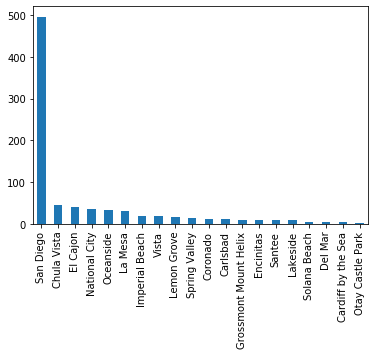

In [60]:
# Part 2 (Plots)

# See how big each residential area ('Place Name') is, depending on the number of tract blocks it occupies.

df['Place Name'].value_counts().plot(kind='bar')

In [28]:
# 2.1 Second common area: Chula Vista

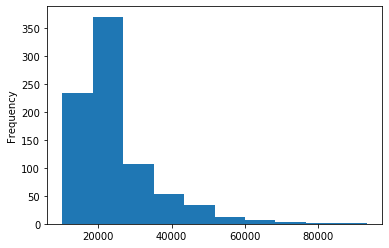

In [29]:
df['Total owner occupied average value of housing units in USD'].plot(kind='hist')

In [30]:
df['Total owner occupied average value of housing units in USD'].mean()

24881.481796116506

In [31]:
# 2.2 Median housing price average: around $20k - $24,832.

In [67]:
df.groupby(['Place Name']).mean()['Total owner occupied average value of housing units in USD'].sort_values(ascending=False)

Place Name
Grossmont Mount Helix    57005.333333
Del Mar                  39152.600000
Coronado                 38234.333333
Cardiff by the Sea       30965.400000
Chula Vista              30517.413043
Solana Beach             28472.200000
Carlsbad                 27715.000000
Oceanside                26868.187500
Encinitas                26227.125000
El Cajon                 25455.634146
Lemon Grove              25433.529412
La Mesa                  25058.100000
Lakeside                 23943.000000
San Diego                23877.852823
Vista                    22901.277778
Spring Valley            22097.466667
Santee                   21104.000000
Imperial Beach           19007.263158
National City            18408.111111
Otay Castle Park         16225.000000
Name: Total owner occupied average value of housing units in USD, dtype: float64

In [69]:
# 2.3 Most expensive housing block (by average price): Grossmont Mount Helix

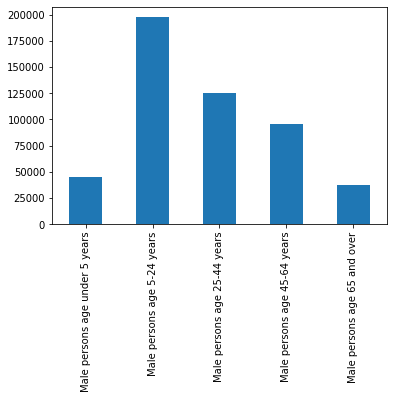

In [32]:
df[['Male persons age under 5 years', 
                  'Male persons age 5-24 years', 
                  'Male persons age 25-44 years', 
                  'Male persons age 45-64 years',
                  'Male persons age 65 and over']].agg(sum).plot(kind='bar')

In [33]:
# 2.4 Age distribution among males in San Diego: mostly 5-24.

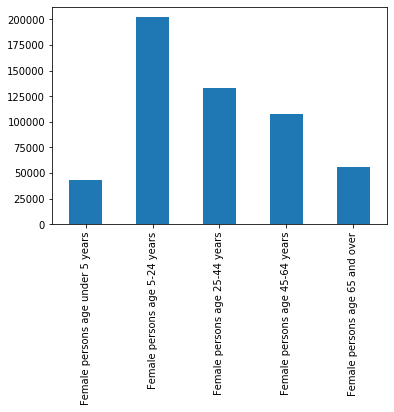

In [34]:
df[['Female persons age under 5 years', 
                  'Female persons age 5-24 years', 
                  'Female persons age 25-44 years', 
                  'Female persons age 45-64 years',
                  'Female persons age 65 and over']].agg(sum).plot(kind='bar')

In [35]:
# 2.4 Age distribution among females in San Diego: also mostly 5-24.

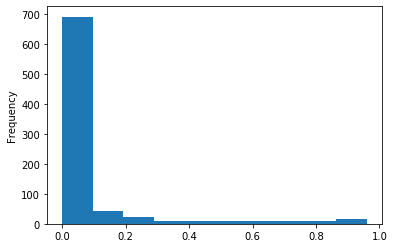

In [36]:
race = (df['Non-white persons']/df['Total persons'])
race = race.replace([np.inf, -np.inf], np.nan)
race.dropna(how="all")

race.plot(kind='hist')

In [37]:
# 2.5 Race distribution: most blocks are primarily occupied by white residents, only a select few are occupied by non-white races


In [38]:
# discrepancy_gen = (df[['Male persons age under 5 years', 
#                   'Male persons age 5-24 years', 
#                   'Male persons age 25-44 years', 
#                   'Male persons age 45-64 years',
#                   'Male persons age 65 and over']].agg(sum).values)
# - (df[['Female persons age under 5 years', 
#                   'Female persons age 5-24 years', 
#                   'Female persons age 25-44 years', 
#                   'Female persons age 45-64 years',
#                   'Female persons age 65 and over']].agg(sum).values)

In [39]:
# import matplotlib.pyplot as plt

# plt.plot(discrepancy_gen)

In [40]:
# Part 3 (Machine learning)

from sklearn.linear_model import LinearRegression

In [41]:
df.columns

Index(['Tract Name', 'Block Group', 'Place Name', 'Total persons',
       'Total male persons', 'Total female persons',
       'Male persons age under 5 years', 'Male persons age 5-24 years',
       'Male persons age 25-44 years', 'Male persons age 45-64 years',
       'Male persons age 65 and over', 'Female persons age under 5 years',
       'Female persons age 5-24 years', 'Female persons age 25-44 years',
       'Female persons age 45-64 years', 'Female persons age 65 and over',
       'White persons', 'Non-white persons',
       'Male persons now married (excludes separated)',
       'Male persons previously married', 'Male persons never married',
       'Female persons now married (excludes separated)',
       'Female persons previously married', 'Female persons never married',
       'Total housing units',
       'Total owner occupied real aggregate (total) value of housing units in USD',
       'Total owner occupied average value of housing units in USD',
       'Total renter oc

In [42]:
# Columns: 

# Total male persons
# Total female persons
# 'Male persons age under 5 years', 'Male persons age 5-24 years',
#        'Male persons age 25-44 years', 'Male persons age 45-64 years',
#        'Male persons age 65 and over', 'Female persons age under 5 years',
#         'Female persons age 5-24 years', 'Female persons age 25-44 years',
#         'Female persons age 45-64 years', 'Female persons age 65 and over',

# Useful predictor columns: columns in the SD1970_population.csv

# Useful result columns: columns in the SD1970_housing.csv

In [43]:
# y = [float]

# def feature(datum):
#     feat = [1, datum[]), float()]
#     return feat

In [44]:
# feature selection: male, white
male_ratio = df['Total male persons']/df['Total persons']
white_ratio = df['White persons']/df['Total persons']

y = df['Total owner occupied average value of housing units in USD']

X = list(zip(male_ratio, white_ratio))
X

[(0.44950055493895674, 0.9800221975582686),
 (0.43923865300146414, 0.9853587115666179),
 (0.4680451127819549, 0.9943609022556391),
 (0.4679334916864608, 0.9857482185273159),
 (0.4335378323108384, 0.9877300613496932),
 (0.43373493975903615, 0.9959839357429718),
 (0.44931506849315067, 0.9789954337899544),
 (0.439701173959445, 0.9690501600853789),
 (0.4477124183006536, 0.9793028322440087),
 (0.43387470997679817, 0.9767981438515081),
 (0.4900398406374502, 0.9243027888446215),
 (0.49600798403193613, 0.9780439121756487),
 (0.45892351274787535, 0.9815864022662889),
 (0.46684053651266766, 0.9720566318926974),
 (0.4992160173682306, 0.816789289591123),
 (0.48003629764065336, 0.7631578947368421),
 (0.4830590513068732, 0.8121974830590513),
 (0.4973097617217525, 0.9438893159108378),
 (0.5036455412226585, 0.9371845204711161),
 (0.4992700729927007, 0.9445255474452555),
 (0.45, 0.915625),
 (0.49203373945641987, 0.9029990627928772),
 (0.49089584850691914, 0.9606700655498908),
 (0.5208747514910537, 0.95

In [45]:
reg = LinearRegression().fit(X, y)

In [46]:
reg.score(X, y)

0.08431572073923344

In [47]:
reg.coef_

array([18870.70079396, 16898.56665099])

In [48]:
reg.intercept_

485.8282084222774

In [49]:
occ = df['Total occupied housing units 1.00 or less persons per room']+df['Total occupied housing units 1.01-1.50 persons per room']+df['Total occupied housing units 1.51 or more persons per room']

occ1 = df['Total occupied housing units 1.00 or less persons per room']/occ
occ2 = df['Total occupied housing units 1.01-1.50 persons per room']/occ
occ3 = df['Total occupied housing units 1.51 or more persons per room']/occ

y = df['Total owner occupied average value of housing units in USD']
X = list(zip(occ1, occ2, occ3))
X

[(0.9864864864864865, 0.006756756756756757, 0.006756756756756757),
 (0.9551569506726457, 0.03587443946188341, 0.008968609865470852),
 (0.9702380952380952, 0.02976190476190476, 0.0),
 (0.9745222929936306, 0.025477707006369428, 0.0),
 (0.9900497512437811, 0.009950248756218905, 0.0),
 (0.9940828402366864, 0.005917159763313609, 0.0),
 (0.9800362976406534, 0.016333938294010888, 0.003629764065335753),
 (0.9786324786324786, 0.01282051282051282, 0.008547008547008548),
 (0.9818913480885312, 0.01609657947686117, 0.002012072434607646),
 (0.9741176470588235, 0.023529411764705882, 0.002352941176470588),
 (0.6861313868613139, 0.17518248175182483, 0.1386861313868613),
 (0.7583081570996979, 0.1027190332326284, 0.13897280966767372),
 (0.7079207920792079, 0.13861386138613863, 0.15346534653465346),
 (0.7203647416413373, 0.17933130699088146, 0.10030395136778116),
 (0.8517940717628705, 0.11544461778471139, 0.0327613104524181),
 (0.8620689655172413, 0.09195402298850575, 0.04597701149425287),
 (0.86363636363

In [ ]:
occ1

In [50]:
reg = LinearRegression().fit(X, y)

In [51]:
reg.score(X, y)

0.1233095320902936

In [52]:
reg.coef_

array([-9.44117057e+14, -9.44117057e+14, -9.44117057e+14])

In [53]:
reg.intercept_

944117056854073.8

In [55]:
unit_sum = df['Occupied and vacant housing units 1 unit structure']+df['Occupied and vacant housing units 2 or more unit structures']

unit1 = df['Occupied and vacant housing units 1 unit structure']/unit_sum
unit2 = df['Occupied and vacant housing units 2 or more unit structures']/unit_sum

y = df['Total owner occupied average value of housing units in USD']
X = list(zip(unit1, unit2))
X

[(0.9534883720930233, 0.046511627906976744),
 (0.9399141630901288, 0.060085836909871244),
 (0.9657142857142857, 0.03428571428571429),
 (0.949685534591195, 0.050314465408805034),
 (0.9234449760765551, 0.07655502392344497),
 (0.9827586206896551, 0.017241379310344827),
 (0.6153846153846154, 0.38461538461538464),
 (0.6378600823045267, 0.36213991769547327),
 (0.5132075471698113, 0.4867924528301887),
 (0.4153498871331828, 0.5846501128668171),
 (0.7019867549668874, 0.2980132450331126),
 (0.5, 0.5),
 (0.8608923884514436, 0.13910761154855644),
 (0.4219977553310887, 0.5780022446689114),
 (0.9982054733064154, 0.001794526693584567),
 (1.0, 0.0),
 (1.0, 0.0),
 (0.9042253521126761, 0.09577464788732394),
 (1.0, 0.0),
 (0.9084507042253521, 0.09154929577464789),
 (0.9753086419753086, 0.024691358024691357),
 (0.9975728155339806, 0.0024271844660194173),
 (0.9354838709677419, 0.06451612903225806),
 (0.5671641791044776, 0.43283582089552236),
 (0.6949152542372882, 0.3050847457627119),
 (0.9552238805970149, 

In [56]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.01192200440409097

In [57]:
y = df['Total owner occupied average value of housing units in USD']
X = list(zip(df['Total persons'], df['Rooms in total occupied and vacant year round housing units']))
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.12793440742894957

In [59]:
reg.coef_

array([-9.88998943,  8.12054842])

In [58]:
# Features with high correlation scores indicate a relationship between the factors and the housing price

In [1]:
plt.scatter(X, y, color = "red")
plt.plot(X, lr.predict(X), color = "green")
plt.title("Average Value vs. Occupancy")
plt.xlabel("Room Occupancy")
plt.ylabel("Total owner occupied average value of housing units in USD")
plt.show()

NameError: name 'plt' is not defined

In [2]:
if ("A satisfies B" == True):
    return 'B'
elif ("A satisfies C" == True):
    return 'C'
else:
    return 'A'

SyntaxError: 'return' outside function (<ipython-input-2-615e2e636db5>, line 2)